In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data, Clean and Save new datasets

In [105]:
df = pd.read_csv("data/sportaanbieders.csv")
df.head(5)

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y
0,Aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,"4,84440832","52,37074001"
1,Aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,"4,95984695","52,40025203"
2,Aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,"4,95984695","52,40025203"
3,Aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,"4,99323066","52,31425676"
4,Aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,"4,86684929","52,36037903"


### Translate Dutch Sport name to English

In [1]:
def translate_text(text):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language="en")

#     print(u"Text: {}".format(result["input"]))
#     print(u"Translation: {}".format(result["translatedText"]))
#     print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))
    return result["translatedText"]


In [106]:
#################
## Clean ########
#################
df.Sport=df.Sport.apply(lambda x: x.lower().strip())


##############################
### Check english translation
##############################

nl_en={}
for s_type in sport_types:
    nl_en[s_type] = translate_text(s_type)



# ##############################
# ## correct some mis-translation
# ##############################

nl_en["zeilen"]="sailing"
nl_en["dans"]="dance"
nl_en["padel"] = "padel"

###############################
## Save Translation to pickle
###############################
# import pickle
# with open("data/sports_translation.pickle", "wb") as f:
#     pickle.dump(nl_en, f)

#### Add translated name to df
df.loc[:, "Sport_en"] = df.Sport.map(nl_en)

### Filter Out Sports Providers outside Amsterdam

In [7]:
###############
# Geo geojson
###############
import json

with open("../geojson.json") as f:
    districts = json.load(f)

district_code = {}
for d in districts["features"]:
    district_code[d["properties"]["Stadsdeel"]]=d["properties"]["Stadsdeel_code"]

df.loc[:, "Stadsdeel"] = df.Stadsdeel.str.replace("Zuid-Oost","Zuidoost")
df.loc[:, "district_code"] = df.Stadsdeel.map(district_code)

### Filter out all providers outside amsterdam
df = df[~df["district_code"].isna()]

### save csv to csv
# df.to_csv("../data/sports_provider_Amsterdam.csv", index=False)

### Aggregate Same Sport with Different Names

In [21]:
sports_lst = df.Sport_en.unique().tolist()
len(sports_lst)

86

In [40]:
## Correct some translation
df.loc[df["Sport_en"] == "the box", "Sport_en"] = "boxing"

df.loc[df["Sport_en"] == "street dance", "Sport_en"]="dance"

for sport in df.Sport_en.unique().tolist():
    if "skat" in sport:
        df.loc[df["Sport_en"] == sport, "Sport_en"] = "skating"

df.loc[df["Sport_en"] == "diving", "Sport_en"]="underwater sports"

for sport in df.Sport_en.unique().tolist():
    if "fit" in sport:
        df.loc[df["Sport_en"] == sport, "Sport_en"] = "fitness"

df.loc[df["Sport_en"] == "mountain sports", "Sport_en"]="climbing"
df.loc[df["Sport_en"] == "klimsport", "Sport_en"]="climbing"
df.loc[df.Sport_en == 'lawn bowling', "Sport_en"] ="bowls"
df.loc[df.Sport_en == "screens", "Sport_en"] = "fencing"

# ## save csv to csv
# df.to_csv("../data/sports_provider_Amsterdam.csv", index=False)

## Explore dataset

In [49]:
df=pd.read_csv("../data/sports_provider_Amsterdam.csv")
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E


### Sport type

In [3]:
################
### Size #######
################
display(df.shape)

sports_lst = df.Sport_en.unique().tolist()
display(len(sports_lst))

(967, 15)

80

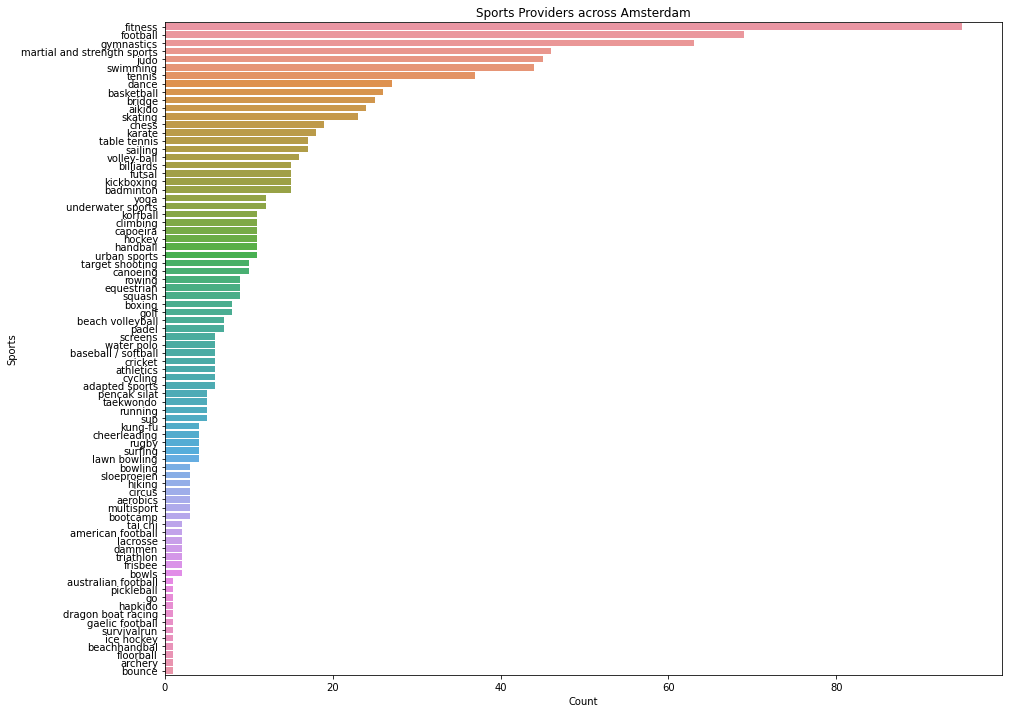

In [7]:
plt.figure(figsize=(15,12))
sns.countplot(y="Sport_en", 
              data=df,
              order = df['Sport_en'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Sports")
plt.title("Sports Providers across Amsterdam")
plt.savefig("../plots/Sports_Count.png")

In [17]:
count_df = pd.DataFrame(df.groupby("Sport_en").count()["Sport"]).reset_index()
count_df = count_df.rename(columns={"Sport":"Count"})
count_df.sort_values(by="Count", ascending=False)

count_df["Count"].nunique()

29

In [46]:
count_df = count_df.sort_values(by="Count",ascending=True)

In [48]:
count_df.shape

(80, 2)

### Treemap

In [50]:
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E


In [68]:
df.loc[:,"Count"] = 1
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code,Count
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F,1
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N,1
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N,1
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T,1
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E,1


In [75]:
import plotly.express as px
fig = px.treemap(df, 
                 color="Sport_en",
                 path = ["Stadsdeel", "Sport_en"],
                 color_continuous_scale="RdBu"
                 )
fig.show()

In [197]:
fig = px.treemap(df, 
                 path = ["Sport_en"],
                )
fig.show()


In [198]:
fig.write_html("../plots/all_sports.html")

In [74]:

fig = px.treemap(df, 
                 path = ["Sport_en", "Stadsdeel"],
                 range_color="pinks",
                 maxdepth=1)
fig.show()

### Categorization

In [201]:
fig = px.treemap(df, 
                 path = ["All", "Sub_Cat", "Sport_en"]
                 )
fig.show()

In [196]:
fig.write_html("../plots/sports_subcat.html")

### update-layout
- [ ] change color theme
- [ ] unify fontsize and only show certain
- [ ] infotext template
- [ ] havor info format

### District

In [38]:
df.Stadsdeel.unique()

array(['Nieuw-West', 'Noord', 'Zuidoost', 'West', 'Buiten Amsterdam',
       'Centrum', 'Oost', 'Zuid', 'Westpoort', 'Diemen', 'Zuid-Oost'],
      dtype=object)

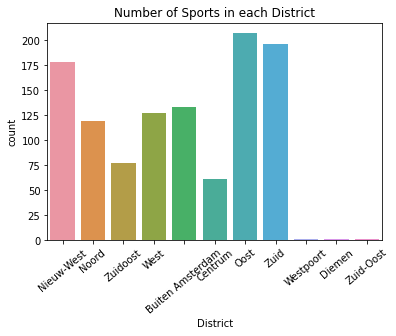

In [58]:
sns.countplot(data=df, x="Stadsdeel")
plt.xlabel("District")
plt.xticks(rotation=40)
plt.title("Number of Sports in each District")
plt.savefig("plots/amount_in_district.png")

In [134]:
import json

with open('geojson.json') as json_file:
    data = json.load(json_file)

In [143]:
for i in data['features']:
    print(i["properties"]["Stadsdeel"])

Centrum
Westpoort
West
Nieuw-West
Zuid
Oost
Noord
Zuidoost


### Map Plot

In [65]:
# import plotly.graph_objects as go

# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

# fig = go.Figure(data=go.Scattergeo(
#         lon = df['long'],
#         lat = df['lat'],
#         text = df['text'],
#         mode = 'markers',
#         marker_color = df['cnt'],
#         ))

# fig.update_layout(
#         title = 'Most trafficked US airports<br>(Hover for airport names)',
#         geo_scope='usa',
#     )
# fig.show()

In [66]:
df=pd.read_csv("data/sports_providers.csv")
df.dtypes

Sport                     object
Naam                      object
Website                   object
Naam accommodatie         object
Adres accommodatie        object
Postcode accommodatie     object
Plaats accommodatie       object
Stadsdeel                 object
Aangepast sporten         object
KvK                      float64
Stadspas                  object
x                         object
y                         object
Sport_en                  object
dtype: object

In [109]:
df.loc[:,"x"]=df.x.str.replace(",", ".")

df.loc[:,"y"]=df.y.str.replace(",", ".")

df.loc[:, ["x","y"]] = df[["x", "y"]].astype("float")

In [110]:
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports


In [111]:
df.to_csv("data/sports_providers.csv", index=False)

In [133]:
df=pd.read_csv("data/sports_providers.csv")

In [116]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['x'],
        lat = df['y'],
        mode = 'markers'
        ))
fig.update_layout(
        title = 'sports provider in district',
        geo_scope='europe')
fig.show()

In [117]:
fig.write_html("plots/scatter_on_map.html")

In [120]:
import plotly.express as px
px.set_mapbox_access_token(open("mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [122]:
import plotly.express as px
px.set_mapbox_access_token(open("mapbox_token").read())
fig = px.scatter_mapbox(df, lat="y", lon="x")
fig.show()

In [123]:

import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [129]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [131]:
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6363215300962, 45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-7

In [132]:
px.data

<module 'plotly.express.data' from '/Users/moyang/.pyenv/versions/3.8.5/envs/projectweb/lib/python3.8/site-packages/plotly/express/data/__init__.py'>